In [86]:
import mtcnn
import cv2
import tensorflow as tf
import os
import numpy as np
import PIL
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from model import mysql

class face_model_py():
    def __init__(self):
        self.detector = mtcnn.MTCNN()
        self.face_model = tf.keras.models.load_model('./facenet_keras.h5', compile=False)
        self.member_list = mysql.check_member()

    #檢查是否為臉部
    def check_face(self , img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pixels = np.asarray(img)
        results = self.detector.detect_faces(pixels)
        if len(results) != 0 :
            x1, y1, w, h = results[0]['box']
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + w, y1 + h
            face_list = [x1, y1, x2, y2]
            return face_list
        else:
            return None
    #創建模型
    def face_MTCNN(self, resize=(160, 160)):
        img_list = []
        label = []
        for member in self.member_list:
            img = cv2.imread(member[4])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            pixels = np.asarray(img)
            results = self.detector.detect_faces(pixels)
            x1, y1, w, h = results[0]['box']
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + w, y1 + h
            face = pixels[y1:y2, x1:x2]
            image = PIL.Image.fromarray(face)
            image = image.resize(resize)
            face_array = np.asarray(image)
            img_list.append(face_array)
            label.append(member[0] - 1)
            for _ in range(20):
                up_img = tf.image.random_flip_up_down(face_array)
                right_img = tf.image.random_flip_left_right(up_img)
                img_list.append(right_img)
                label.append(member[0] - 1)
                print(member[2], right_img.shape)
        train = np.asarray(img_list)
        target = np.asarray(label)
        return train, target

    def face_pixes(self , x):
        train = x.astype('float32')
        mean, std = train.mean(), train.std()
        face_pixes = (train - mean) / std
        return face_pixes

    #預測資料
    def facenet_one_photo(self , img, resize=(160, 160)):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pixels = np.asarray(img)
        results = self.detector.detect_faces(pixels)
        x1, y1, w, h = results[0]['box']
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + w, y1 + h
        face = pixels[y1:y2, x1:x2]
        image = PIL.Image.fromarray(face)
        image = image.resize(resize)
        face_array = np.asarray(image)
        face_array = face_array.astype('float32')
        mean, std = face_array.mean(), face_array.std()
        face_pixes = (face_array - mean) / std
        face_pixes = np.expand_dims(face_pixes, axis=0)
        y_hat = self.face_model.predict(face_pixes)
        return y_hat

    def predict_photo(self , img):
        e_list = []
        p_hat = None
        model = joblib.load('./face_model.pkl')
        photo_hat = self.facenet_one_photo(img=img)
        for m in self.member_list:
            member_array = np.frombuffer(m[3], dtype='float32')
            e = round(np.linalg.norm(photo_hat[0] - member_array), 2)
            e_list.append(e)

        for e_tag in e_list:
            if e_tag < 9:
                print('臉部接近值:' , e_tag)
                p_hat = model.predict(photo_hat)
                break

        if p_hat != None:
            result = mysql.select_member(int(p_hat[0]) + 1)[0]
        else:
            result = None

        return result


In [87]:
face_model = face_model_py()

ok


In [97]:
train, target = face_model.face_MTCNN()
x_train, x_test, y_train, y_test = train_test_split(train, target, train_size=0.8, random_state=1)
x_train_pixes = face_model.face_pixes(x_train)
x_test_pixes = face_model.face_pixes(x_test)
x_train_yhat = face_model.face_model.predict(x_train_pixes)
x_test_yhat = face_model.face_model.predict(x_test_pixes)

Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)
Abdullah_Gul (160, 160, 3)


Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
Monique_Garbrecht-Enfeldt (160, 160, 3)
wu_line (160, 160, 3)
wu_line (160, 160, 3)
wu_line (160, 160, 3)
wu_line (160, 160, 3)
wu_line (160, 160, 3)
wu_line (160, 160, 3)
wu_line (160, 160, 3)
wu_line (160, 160, 3)
wu_line (160, 160, 3)
wu

In [106]:
from sklearn.preprocessing import normalize
x_train_norm = normalize(x_train_yhat ,  norm='l2')
x_test_norm = normalize(x_test_yhat ,  norm='l2')

In [98]:
# 將臉部特徵轉換為128個特徵向量
print('x_train:', x_train_yhat.shape)
print('x_test:', x_test_yhat.shape)

x_train: (504, 128)
x_test: (126, 128)


In [111]:
model = SVC(kernel='linear', C=0.5 , gamma='auto')
model.fit(x_train_norm , y_train)
y_pred = model.predict(x_test_norm )
print('score:', accuracy_score(y_test, y_pred))

# joblib.dump(model, './face_model.pkl')


score: 0.9761904761904762


In [109]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score #交叉驗證
from sklearn.model_selection import RepeatedStratifiedKFold #重複分層 K 折交叉驗證器。
from sklearn.linear_model import Perceptron #類神經網路模組
clf = SVC(kernel='linear', C=0.5 , gamma='auto')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=50, random_state=1) #輔助類神經網路 創建10次折 ,可折疊3次
# evaluate model
scores = cross_val_score(clf, x_train_norm, y_train , scoring='accuracy', cv=cv, n_jobs=-1) #cv 是分成幾組 scoring是精準度  n_jobs=-1是使用所有處理器

print(scores)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


[0.96078431 0.94117647 0.96078431 0.98039216 0.92       0.94
 1.         0.96       0.92       0.96       0.98039216 0.96078431
 0.96078431 0.98039216 0.98       0.96       0.96       0.96
 0.96       0.9        0.94117647 0.96078431 1.         0.98039216
 1.         0.96       0.98       0.88       0.9        0.96
 0.94117647 0.94117647 1.         0.92156863 0.98       0.96
 0.98       0.94       1.         0.96       0.94117647 0.98039216
 0.94117647 0.94117647 0.98       0.98       0.96       1.
 0.92       0.94       0.94117647 0.98039216 0.94117647 0.98039216
 0.94       0.96       0.86       0.96       0.98       0.98
 0.98039216 0.98039216 0.90196078 1.         0.96       0.94
 0.96       0.96       0.9        1.         0.94117647 0.98039216
 1.         0.98039216 1.         0.96       0.98       0.9
 0.94       0.92       0.96078431 0.98039216 0.94117647 0.94117647
 0.98       0.96       0.98       0.92       0.96       0.96
 0.92156863 0.98039216 1.         1.         0.98   

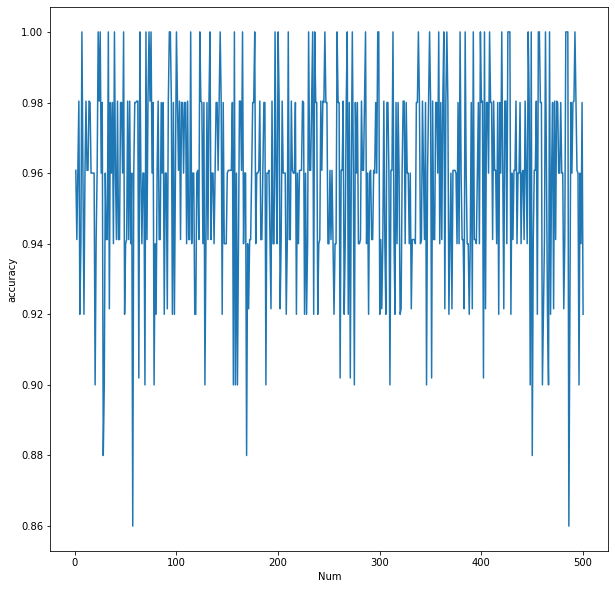

In [110]:
#畫出重複執行的精準度
import matplotlib.pyplot as plt
a = [i for i in range( 1 , len(scores)+1)]
plt.figure(figsize=(10,10))
plt.plot(a , scores)
plt.xlabel('Num')
plt.ylabel('accuracy')
plt.show()

In [113]:
img = cv2.imread('./face_image/eric2.jpg')
y_hat = face_model.facenet_one_photo(img)
y_hat_norm = normalize( y_hat ,  norm='l2')
result = mysql.select_member(int(model.predict(y_hat_norm)[0]) + 1)
print(result)

ok
((7, '27321952-f514-11eb-a724-085bd67941d0', 'eric'),)


In [122]:
#測試現有模型
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score #交叉驗證
from sklearn.model_selection import RepeatedStratifiedKFold #重複分層 K 折交叉驗證器。
from sklearn.linear_model import Perceptron #類神經網路模組
from sklearn.metrics import mean_squared_error , r2_score
import os
clf = joblib.load(f'{os.getcwd()}/model/face_model.pkl')
y_pred = model.predict(x_test_norm)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=50, random_state=1)
scores = cross_val_score(clf, x_train_norm, y_train , scoring='accuracy', cv=cv, n_jobs=-1) #cv 是分成幾組 scoring是精準度  n_jobs=-1是使用所有處理器

# print(scores)
print('score:', accuracy_score(y_test, y_pred))
print('MSE:' , mean_squared_error(y_test , y_pred ,squared=False))
print( 'R-squre:', r2_score(y_test , y_pred))

score: 0.9761904761904762
MSE: 1.7020062857772873
R-squre: 0.9658379072208368


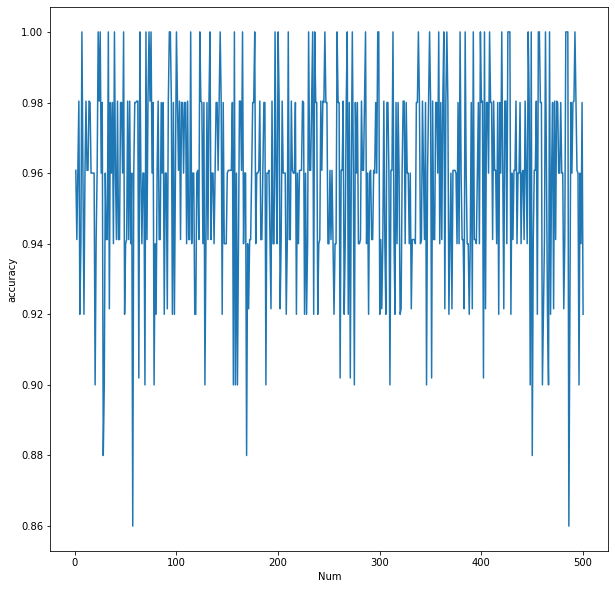

In [120]:
#畫出重複執行的精準度
import matplotlib.pyplot as plt
a = [i for i in range( 1 , len(scores)+1)]
plt.figure(figsize=(10,10))
plt.plot(a , scores)
plt.xlabel('Num')
plt.ylabel('accuracy')
plt.show()